# Hausaufgabe 4
## Schallerzeugung durch einen umströmten Zylinder (Teil 1)
<!-- Lizensiert unter (CC BY 4.0) Gert Herold -->

Bei der Umströmung eines zylindrischen Körpers bilden sich hinter diesem häufig [Wirbelstraßen](https://de.wikipedia.org/wiki/K%C3%A1rm%C3%A1nsche_Wirbelstra%C3%9Fe) aus.
Je nach Medium, Strömungsgeschwindigkeit und Durchmesser des Zylinders können die gegenläufigen Wirbel wahrnehmbare Töne verursachen.

Hier soll basierend auf experimentellen Daten untersucht werden, wie die erzeugten Töne von der Strömungsgeschwindigkeit abhängen.
In einem Windkanal wurden zu diesem Zweck die Schallabstrahlung eines Zylinder mit 6 mm Durchmesser bei ~~15~~ 13 verschiedenen Geschwindigkeiten zwischen ca. $8$ und $50\,\frac{\text{m}}{\text{s}}$ gemessen und das Ergebnis in WAV-Dateien abgespeichert.

### 1) Einlesen der Daten

Die WAV-Dateien sollten für diese Aufgabe entpackt und in einem Unterordner "data" abgelegt werden.

**1.1) Erstellen Sie automatisiert eine Liste `wavlist` der Dateinamen der WAV-Dateien im Unterordner "data". Extrahieren Sie die jeweils zugehörige Strömungsgeschwindigkeit in $\frac{\text{m}}{\text{s}}$ automatisiert aus den Dateinamen, schreiben Sie sie in eine Liste `vlist` mit Fließkommawerten. Geben Sie beide Listen aus.**

Hinweis: Als Dezimaltrennzeichen wurde für die Geschwindigkeit im Dateinamen ein "o" verwendet, um Probleme mit der Identifikation der Dateiendung zu vermeiden.

In [1]:
# Hier eigenen Code schreiben ...
import os
path = "./data"

wavlist = os.listdir(path=path)
print(f"Type: {type(wavlist)}")
print(f"{wavlist}")

vlist = [ float(val.replace("06_mm_", "").replace("_mps.wav", "").replace("o",".")) for val in wavlist]

# Dem assertion error gerecht werden
print("\nWavlist mit ./data/ vorne: \n")
wavlist = [f"{path}/{val}" for val in wavlist]

print(wavlist, end="\n\n") 
print("vlist:\n", vlist)

Type: <class 'list'>
['06_mm_08o32_mps.wav', '06_mm_10o73_mps.wav', '06_mm_14o10_mps.wav', '06_mm_18o69_mps.wav', '06_mm_22o10_mps.wav', '06_mm_25o06_mps.wav', '06_mm_29o76_mps.wav', '06_mm_34o00_mps.wav', '06_mm_37o25_mps.wav', '06_mm_40o95_mps.wav', '06_mm_44o07_mps.wav', '06_mm_45o42_mps.wav', '06_mm_47o31_mps.wav']

Wavlist mit ./data/ vorne: 

['./data/06_mm_08o32_mps.wav', './data/06_mm_10o73_mps.wav', './data/06_mm_14o10_mps.wav', './data/06_mm_18o69_mps.wav', './data/06_mm_22o10_mps.wav', './data/06_mm_25o06_mps.wav', './data/06_mm_29o76_mps.wav', './data/06_mm_34o00_mps.wav', './data/06_mm_37o25_mps.wav', './data/06_mm_40o95_mps.wav', './data/06_mm_44o07_mps.wav', './data/06_mm_45o42_mps.wav', './data/06_mm_47o31_mps.wav']

vlist:
 [8.32, 10.73, 14.1, 18.69, 22.1, 25.06, 29.76, 34.0, 37.25, 40.95, 44.07, 45.42, 47.31]


In [2]:
# Hier sind einige Plausibilitätstests:
assert len(wavlist) == len(vlist) == 13
assert all('data' in _ for _ in wavlist)
assert type(vlist[0]) == float

**1.2) Laden Sie die Schalldruck-Zeitdaten aus den WAV-Dateien. Plotten Sie die Daten für alle Geschwindigkeiten mit korrekten [x-Achsenbeschriftung](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html) und [Kenn](https://stackoverflow.com/questions/25239933/how-to-add-title-to-subplots-in-matplotlib)[zeichnung](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.text.html) der Geschwindigkeit in getrennt untereinanderliegenden Diagrammen.**

*Hinweise:*
  * *WAV-Dateien enthalten [digitalisierte Zeitdaten](https://de.wikipedia.org/wiki/Puls-Code-Modulation), z.B. können damit mit Mikrofonen aufgezeichnete zeitliche Schwankungen des Luftdrucks (Schall) abgespeichert werden.*
  * *Die WAV-Daten sind als Integer-Werte gespeichert. Um daraus z.B. Schalldrücke zu berechnen, müsste bekannt sein, welchem Schalldruckwert der maximale Integerwert entspricht. In dieser Aufgabe sind jedoch diesbezüglich nur Relativ-Werte von Interesse, sodass auf eine entsprechende Umrechnung verzichtet werden kann.*
  * *Die zeitliche Zuordnung der Werte hingegen muss exakt geschehen, wofür die [Abtastrate](https://de.wikipedia.org/wiki/Abtastrate), die in WAV-Dateien mit abgespeichert ist, bekannt sein muss.*

In [3]:
from scipy.io import wavfile
import scipy.io
import numpy as np

timedata = []
for entry in wavlist:
    samplerate, data = wavfile.read(entry)
    timedata.append(data)

timedata = np.array(timedata)
print(timedata.shape)
print(f"number of datafiles = {timedata.shape[0]}")
print(f"number of entries = {timedata.shape[1]}")
print(f"samplerate = {samplerate}")
length = data.shape[0] / samplerate
print(f"length = {length}s")
timedata

(13, 512000)
number of datafiles = 13
number of entries = 512000
samplerate = 51200
length = 10.0s


array([[  2528,   2546,   3208, ...,  12835,  12033,  11998],
       [ 20467,  20251,  20086, ...,  19087,  19066,  19303],
       [  3593,   3598,   3789, ...,  -3907,  -3948,  -4144],
       ...,
       [ -8141,  -7480,  -7015, ...,   3994,   3915,   3719],
       [ -2802,  -2770,  -1554, ...,   1037,   -305,   -561],
       [ -7188,  -7205,  -4340, ..., -10505, -10748, -10664]], dtype=int16)

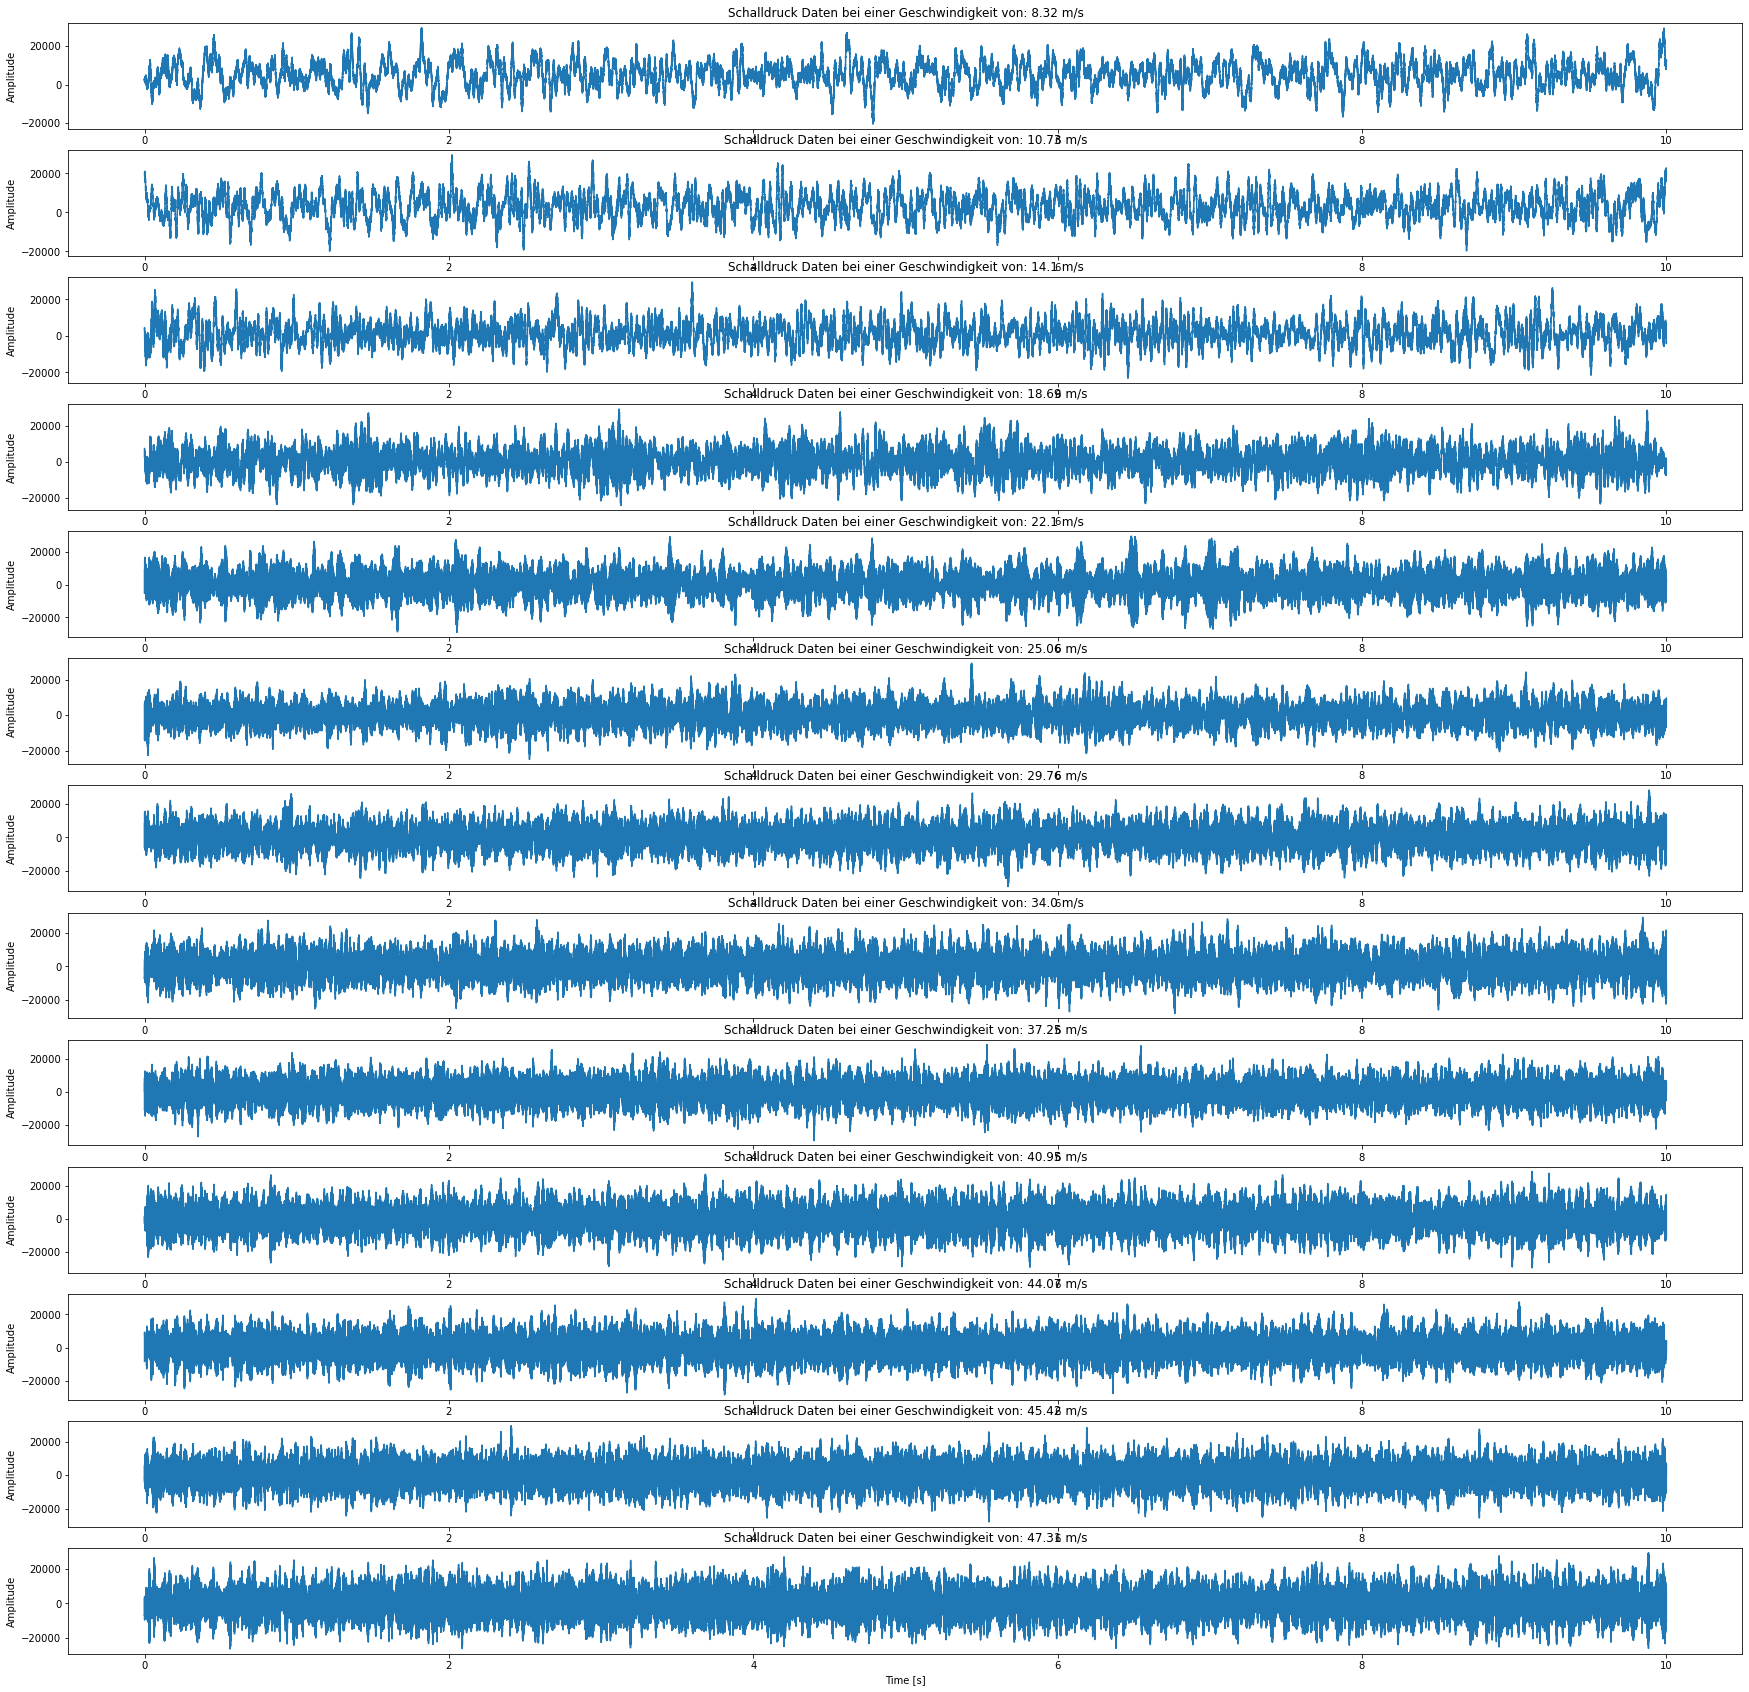

In [4]:
# plot it all
import matplotlib.pyplot as plt

time = np.linspace(0., length, data.shape[0])

plt.figure(1, (30,30))
for i,data in enumerate(timedata):
    plt.subplot(timedata.shape[0], 1, i+1)
    plt.plot(time, data[:])
    plt.title(
        f"Schalldruck Daten bei einer Geschwindigkeit von: {vlist[i]} m/s")
    plt.ylabel("Amplitude")
    plt.xlabel("Time [s]")

plt.show()


Um aus den Zeitdaten $p(t)$ Informationen über die darin enthaltenen Töne zu ermitteln, ist es sinnvoll, aus den Datensätzen jeweils ein Spektrum $p(f)$ zu berechnen. 
Dies geschieht allgemein über eine [Fourier-Transformation](https://de.wikipedia.org/wiki/Fourier-Transformation) bzw. für diskret abgetastete Werte mittels einer [Diskreten Fourier-Transformation](https://de.wikipedia.org/wiki/Diskrete_Fourier-Transformation) (DFT). Für reellwertige Signale ist diese z.B. im Modul [*numpy.fft*](https://docs.scipy.org/doc/numpy/reference/routines.fft.html) mit der Funktion [*rfft()*](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.rfft.html) implementiert.

### 2) Hiebton

**2.1) Berechnen Sie die Spektren (Amplitudenquadrat über Frequenz) aller Zeitsignale und stellen Sie sie in einem gemeinsamen Diagramm dar:**

  * Berechnen Sie das Betragsquadrat $|p(f)|^2$ für die einzelnen Werte.
  * Stellen Sie diese nur für Frequenzen [bis](https://docs.scipy.org/doc/numpy/reference/generated/numpy.searchsorted.html) 2500 Hz dar. Beschriften Sie die x-Achse korrekt.
  * Um den ggf. verdeckten Verlauf einiger Spektren sichtbar zu machen, setzen Sie den Parameter *alpha* der Plotfunktion auf einen Wert kleiner als 1.
  * Wählen Sie eine ausreichende Größe der Abbildung.
  * Stellen Sie die y-Achse mit logarithmischer Skalierung dar.
  * Fügen Sie der Abbildung eine Legende hinzu, damit die jeweiligen Spektren zuordenbar sind.
  
_Hinweis: Die zugehörigen Frequenzen lassen sich mithilfe der Funktion [rfftfreq()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.rfftfreq.html) berechnen. 
Anzahl der Samples sowie Abtastrate sind bereits aus Aufgabenteil 1 bekannt._

In [5]:
# spectra = df.timedata
# spectra = np.array(spectra)
# Notice how the final element of the 
# fft output is the complex conjugate of the second element, for real input. 
# For rfft, this symmetry is exploited to compute only the non-negative frequency terms.

print("timedata.shape: ",timedata.shape)
#wir packen abs direkt in die Transformation
spectra = abs(np.fft.rfft(timedata))
print("spectra.shape: ",spectra.shape)
print("spectra.ndim: ", spectra.ndim)

spectra

timedata.shape:  (13, 512000)
spectra.shape:  (13, 256001)
spectra.ndim:  2


array([[2.69752110e+09, 1.36531544e+07, 4.76119676e+07, ...,
        5.22482303e+04, 2.36405235e+05, 6.28431000e+05],
       [1.61957802e+09, 1.58459636e+07, 9.23927697e+06, ...,
        3.07517071e+04, 1.27984066e+05, 3.81990000e+04],
       [7.13112407e+08, 4.66380601e+06, 2.13871360e+07, ...,
        4.20139311e+04, 2.18035301e+04, 6.94530000e+04],
       ...,
       [1.12614360e+07, 9.91941097e+05, 7.54238040e+05, ...,
        8.00062406e+04, 7.07932721e+04, 1.10074000e+05],
       [1.36196670e+07, 1.27211908e+06, 1.50960398e+06, ...,
        1.90863567e+05, 1.06509364e+05, 1.99235000e+05],
       [1.19320280e+07, 1.84334256e+05, 1.22192176e+05, ...,
        1.40301294e+04, 5.64932341e+04, 2.42780000e+05]])

In [6]:
# Berechnen Sie das Betragsquadrat für die einzelnen Werte
# spectra = np.array(spectra)

spectra_abs_pow2 = spectra**2

print(f"spectra.shape: {spectra.shape}")
print(f"spectra.min: {spectra.min()}") 
print(f"spectra.max: {spectra.max()}")

print("spectra_abs_pow2.shape: ",spectra_abs_pow2.shape)
print("spectra_abs_pow2.min: ",spectra_abs_pow2.min())
print("spectra_abs_pow2.max: ",spectra_abs_pow2.max())

spectra.shape: (13, 256001)
spectra.min: 63.97334694523999
spectra.max: 2697521097.0
spectra_abs_pow2.shape:  (13, 256001)
spectra_abs_pow2.min:  4092.5891193760467
spectra_abs_pow2.max:  7.276620068760083e+18


timedata shape: 512000
np.where [25000]
freq.shape (512000,)
idx: 512000
idx:  25000


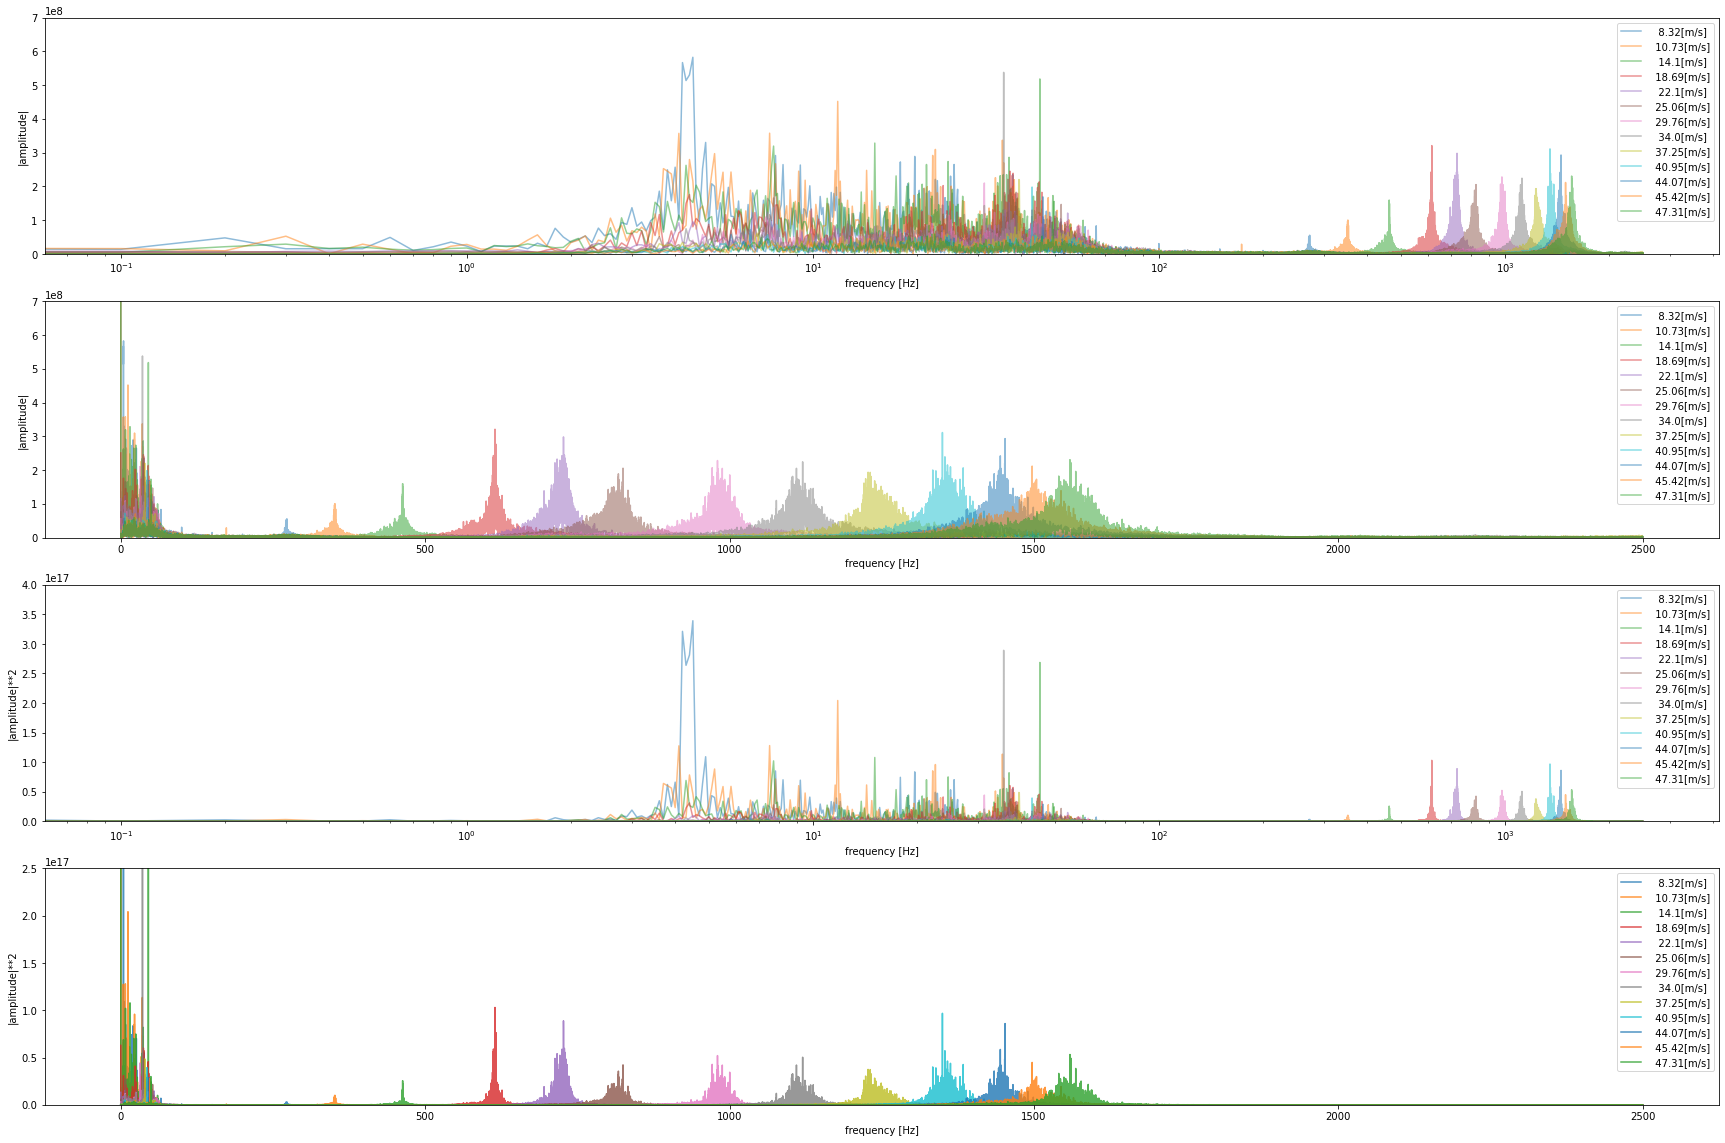

In [7]:
# Sellen Sie diese nur für Frequenzen bis 2500Hz dar. Beschriften Sie die x-Achse korrekt.
# fftfreq
print("timedata shape:", timedata.shape[1])

# Frequenz und dann Index zur Frequenz von 2500Hz berechnen
freq = np.fft.fftfreq(timedata.shape[1], d=1/samplerate)
print("np.where", np.where(freq == 2500)[0])
idx = np.searchsorted(freq, 2500, side="left")  # Frequenz_max = 2500
print("freq.shape", freq.shape)
print("idx:", idx)
freq[0:1000]
idx = np.where(freq == 2500)[0][0]
print("idx: ", idx)




# AB HIER IST EIGENTLICH NICHT TEIL DER AUFGABENSTELLUNG. DIESE GEHT ERST IM NÄCHSTEN CODEBLOCK WEITER

plt.figure(2, (30, 20))
# plots und plots und plots und plots (Einmal mit Betrag und dann mit Betrag zum Quadrat)
b = plt.subplot(411)
b.set_xscale("log")
# b.set_yscale("log")
b.set_ylim([-2500, 700000000])
b.set_xlabel("frequency [Hz]")
b.set_ylabel("|amplitude|")
for i, row in enumerate(spectra):
    # plt.plot(freq[:idx], spectra[0][:idx], alpha=0.9)
    b.plot(freq[:idx], row[:idx], alpha=0.5)

b.legend([f"{entry: >7}{'[m/s]': <5}"  for entry in  vlist])

c = plt.subplot(412)
# c.set_xscale("log")
# b.set_yscale("log")
c.set_ylim([-2500, 7e8])
c.set_xlabel("frequency [Hz]")
c.set_ylabel("|amplitude|")
for i, row in enumerate(spectra):
    # plt.plot(freq[:idx], spectra[0][:idx], alpha=0.9)
    c.plot(freq[:idx], row[:idx], alpha=0.5)

c.legend([f"{entry: >7}{'[m/s]': <5}" for entry in vlist])

d = plt.subplot(413)
d.set_xscale("log")
# b.set_yscale("log")
d.set_ylim([0, 4e17])
d.set_xlabel("frequency [Hz]")
d.set_ylabel("|amplitude|**2")
for i, row in enumerate(spectra_abs_pow2):
    # plt.plot(freq[:idx], spectra[0][:idx], alpha=0.9)
    d.plot(freq[:idx], row[:idx], alpha=0.5)

d.legend([f"{entry: >7}{'[m/s]': <5}" for entry in vlist])

e = plt.subplot(414)
# e.set_xscale("log")
# b.set_yscale("log")
e.set_ylim([0, 2.5e17])
e.set_xlabel("frequency [Hz]")
e.set_ylabel("|amplitude|**2")
for i, row in enumerate(spectra_abs_pow2):
    # plt.plot(freq[:idx], spectra[0][:idx], alpha=0.9)
    e.plot(freq[:idx], row[:idx], alpha=0.8)

e.legend([f"{entry: >7}{'[m/s]': <5}" for entry in vlist])


plt.show()

In [8]:
idx

25000

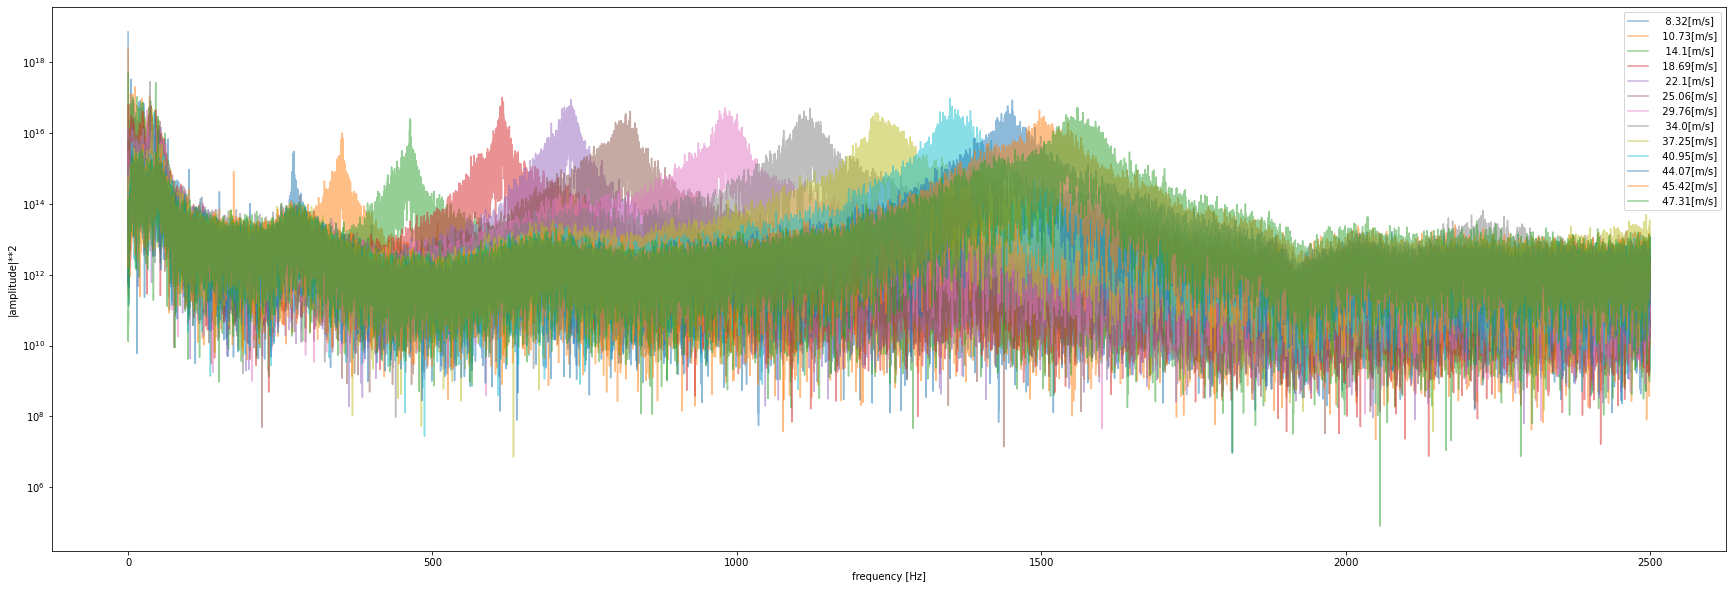

In [16]:
# HIER DAS EIGENTLICHE PLOT

plt.figure(5, (30,10))
e = plt.subplot(111)

for i, row in enumerate(spectra_abs_pow2):
    # plt.plot(freq[:idx], spectra[0][:idx], alpha=0.9)
    e.plot(freq[:idx], row[:idx], alpha=0.5)

e.legend([f"{entry: >7}{'[m/s]': <5}" for entry in vlist])
e.set_yscale("log")
e.set_xlabel("frequency [Hz]")
e.set_ylabel("|amplitude|**2")

plt.show()

**2.2) Finden Sie für jede Strömungsgeschwindigkeit den jeweils markanten Ton (d.h. den Maximalwert im Spektrum).**
  * Vernachlässigen Sie in Ihrer Betrachtung Frequenzen unter 100 Hz.
  * Geben Sie die charakteristische Frequenz $f$ für jede Geschwindigkeit $v$ in übersichtlicher Form aus, z.B.: `v:  0.00 m/s,    f:    0.0 Hz`

In [20]:
# Hier eigenen Code schreiben ...
# hz_100 = np.searchsorted(freq, 100, side="left")

hz_100 = np.where(freq == 100)[0][0]
print(f"Index 100Hz: {hz_100}")
# print(spectra_abs_pow2[:, hz_100:])

max_spectra = np.amax(spectra_abs_pow2[:, hz_100:], axis=1)
# max_spectra, spectra_abs_pow2[0,hz_100:].max()
freq_where_max = []
for r_s, m_s in zip(spectra_abs_pow2, max_spectra):
    # print(r_s, r_m)
    # print(np.argwhere(r_s == m_s))
    freq_where_max.append(np.argwhere(r_s == m_s)[0][0])

freq_where_max = np.array(freq_where_max) /10


for val, speed in zip(freq_where_max, vlist):
    print(f"v:{speed:>10} m/s  f:{val:>10} Hz")



# für HA5:
import pandas as pd
pd.DataFrame(freq_where_max).to_csv("hiebsounds.csv")

Index 100Hz: 1000
v:      8.32 m/s  f:     272.8 Hz
v:     10.73 m/s  f:     351.7 Hz
v:      14.1 m/s  f:     463.0 Hz
v:     18.69 m/s  f:     614.7 Hz
v:      22.1 m/s  f:     727.2 Hz
v:     25.06 m/s  f:     825.0 Hz
v:     29.76 m/s  f:     980.2 Hz
v:      34.0 m/s  f:    1120.1 Hz
v:     37.25 m/s  f:    1227.6 Hz
v:     40.95 m/s  f:    1349.7 Hz
v:     44.07 m/s  f:    1452.6 Hz
v:     45.42 m/s  f:    1497.1 Hz
v:     47.31 m/s  f:    1559.2 Hz


### 3) Modellbildung

Es soll angenommmen werden, dass ein annähernd linearer Zusammenhang der beiden Größen $v$ und $f$ besteht. 
Um diesen zu ermitteln, soll daher eine [Regressionsgerade](https://de.wikipedia.org/wiki/Lineare_Einfachregression) berechnet werden.
Eine Gerade im zweidimensionalen Raum ist definiert durch 2 Parameter $a, b$:
$$
f = a\,v + b
$$

Die Koeffizienten $a$ und $b$ der Regressionsgerade berechnen sich über:

$$
a=\frac{\sum_{i=1}^{N} (v_i - \overline v)(f_i - \overline f)}{\sum_{i=1}^{N}(v_i - \overline v)^2}\\
b=\overline f - a\,\overline v
$$

**3.1) Schreiben Sie eine Funktion _ab()_, die für beliebige, gleich lange Arrays _v_ und _f_ die Geraden-Parameter _a_ und _b_ berechnet und zurückgibt.**

In [104]:
def ab(v,f):
    # Hier eigenen Code schreiben ...
    if v.size is not f.size:
        return None
    
    a = np.sum((v[:] - v.mean()) * (f[:] - f.mean())) / \
        np.sum( (v[:] - v.mean())**2 )

    b = f.mean() - a*v.mean()

    return a,b

In [105]:
# Hier ist ein Plausibilitätstest:

import numpy as np
assert ab(np.array([1,2]),np.array([0,1])) == (1.,-1.), 'ab-Funktion'
tmp_1 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
tmp_2 = np.array([0, 3, 4, 3, 4, 12, 6, 7, 8, 9, 10])
print(ab(tmp_1, tmp_2))
print(ab(tmp_1[-1], tmp_2 ))


(0.8727272727272727, 1.6363636363636367)
None


**3.2) Wenden Sie die Funktion auf die Wertepaare aus Aufgabenteil 2.2 an und zeichnen Sie die Regressionsgerade (als Linie) zusammen mit den Ausgangswerten (als Punkte) in ein Diagramm.**

  * Achten Sie auf korrekte Achsenbeschriftungen.
  * Geben Sie außerdem an, welche charakteristischen Töne bei $v=15\,\frac{\text{m}}{\text{s}}$, $v=42\,\frac{\text{m}}{\text{s}}$ und $v=50\,\frac{\text{m}}{\text{s}}$ zu erwarten wären.
  * Zeichnen Sie die Abweichung der gemessenen Werte zur Regressionsgerade in ein separates Diagramm.
  * Wie groß sind Mittelwert und Standardabweichung dieser Abweichungen?

33.01050752747628 -2.2422556599567542
[ 0.39483303 -0.26049011 -0.20590048 -0.02413003 -0.0899607  -0.00106298
  0.04955164 -0.01500027  0.20085026  0.16197241  0.06918892  0.00500376
 -0.28485546]


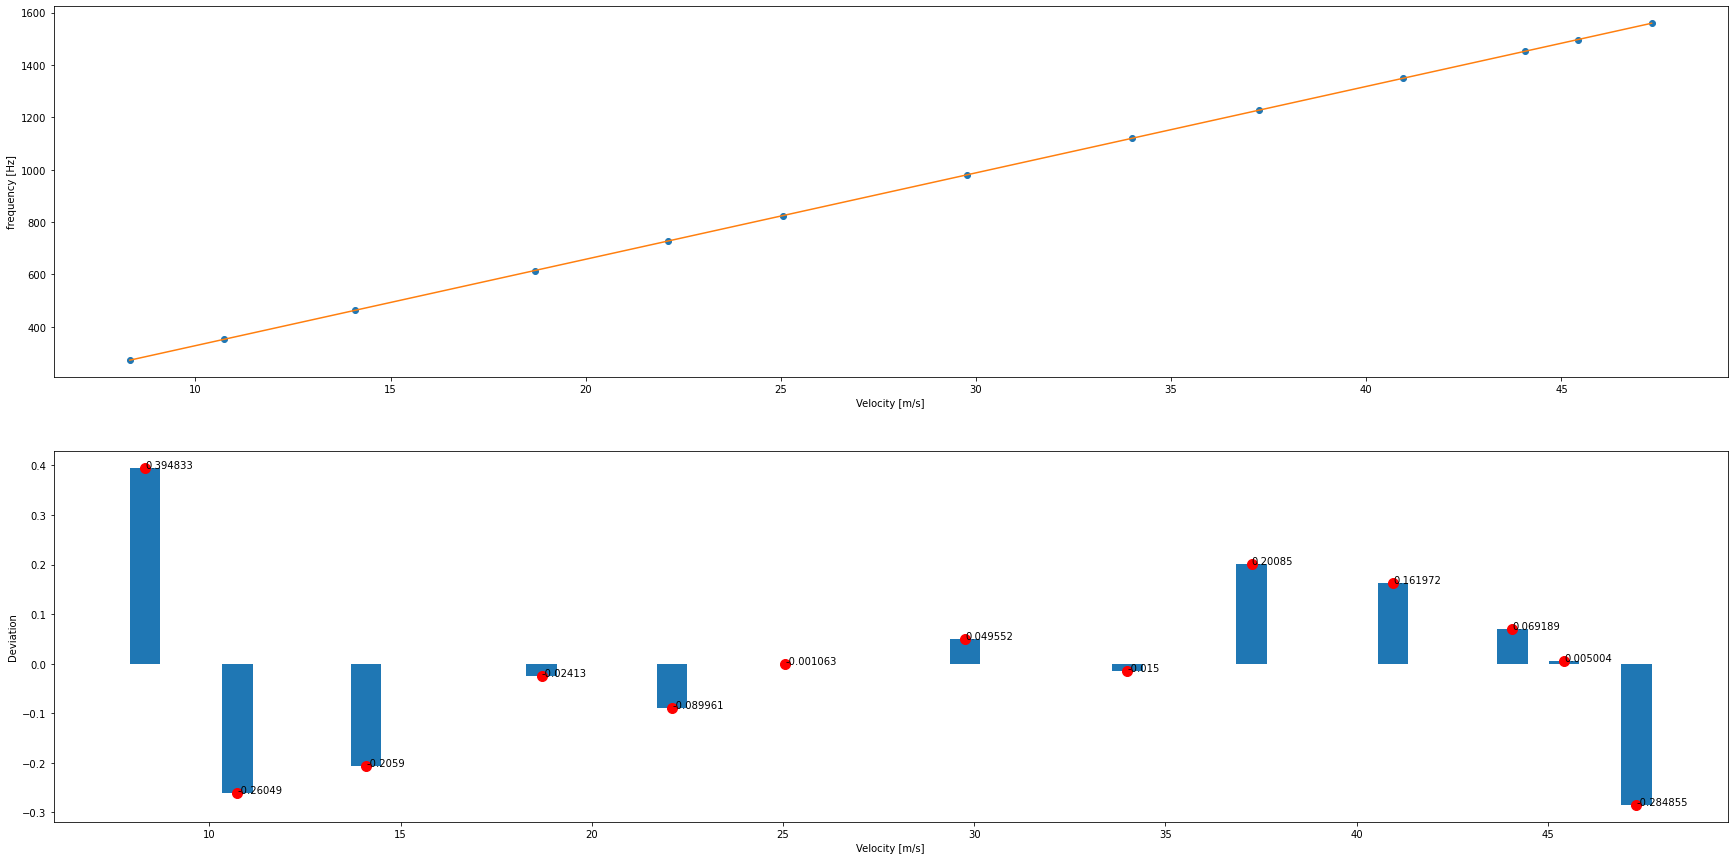

expected sound at 15: 492.9153572521874
expected sound at 42: 1384.199060494047
expected sound at 50: 1648.2831207138572

Mean of deviation: -1.3117712044801848e-13
Standard deviation: 0.1818770897661225


<AxesSubplot:>

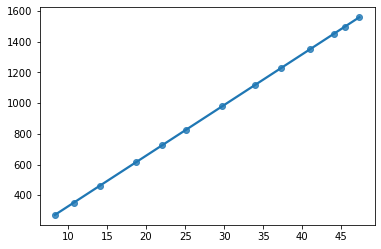

In [112]:
# Hier eigenen Code schreiben ...
vlist = np.array(vlist)
# a,b = ab(vlist, max_spectra)
a,b = ab(vlist, freq_where_max)
# a,b = np.polyfit(vlist, freq_where_max, 1)
print(a,b)



plt.figure(3, (30,15))
plt.subplot(211)
plt.plot(vlist, freq_where_max, 'o')
plt.plot(vlist, a * vlist + b )


plt.xlabel("Velocity [m/s]")
plt.ylabel("frequency [Hz]")
# plt.axis("equal")
# plt.show()


plt.subplot(212)  # Abweichung berechnen
deviation = freq_where_max - (a*vlist+b)
print(deviation)
plt.plot(vlist, deviation, linestyle='None', marker="o", markersize=10, c="r")
plt.bar(vlist, deviation)
for i,j in zip(vlist, deviation):
    plt.annotate(str(round(j, ndigits=6)), xy=(i,j))

plt.ylabel("Deviation")
plt.xlabel("Velocity [m/s]")
plt.show()
print(f"expected sound at 15: {a * 15 + b}")
print(f"expected sound at 42: {a * 42 + b}")
print(f"expected sound at 50: {a * 50 + b}", end="\n\n")

print(f"Mean of deviation: {np.mean(deviation)}")
print(f"Standard deviation: {np.std(deviation)}")

import seaborn as sns
sns.regplot(x=vlist, y=freq_where_max)
